In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Min, Max, integrate
import sympy

p, q, y, b = sympy.symbols("p q y b",real = True, positive = True)
h = 3*y**2
b_v = 0.3

n = 2500
u = integrate(Max(0,Min(1, p*q/b)*y-q),(y,0,1))
u_fun = sympy.lambdify([p,q],u.subs(b,b_v))


# P, Q = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
X, Y = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
U = np.zeros((n,n))
for ii in range(n):
    for jj in range(n):
        U[ii,jj] = u_fun(X[ii,jj],Y[ii,jj])

llega_fondo = np.zeros(100)
p_lin = np.linspace(b_v,1,100)
for idx, p_v in enumerate(p_lin):
    llega_fondo[idx] = b_v/p_v


<lambdifygenerated-22>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return select([greater_equal(3.33333333333333*p*q, 1),True], [q*amin((1,q), axis=0) - q - 1/2*amin((1,q), axis=0)**2 + 1/2,-1.66666666666667*p*q*amin((1,0.3/p), axis=0)**2 + 1.66666666666667*p*q + q*amin((1,0.3/p), axis=0) - q], default=nan)


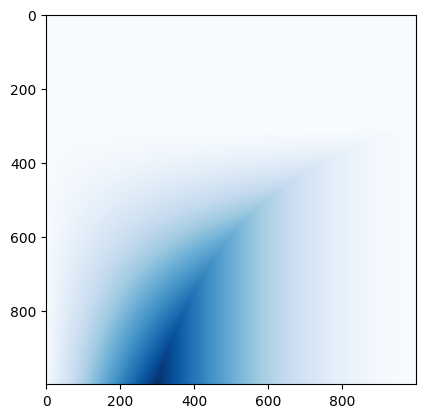

In [36]:
plt.imshow(U, cmap='Blues')

C:\Users\pcpat\AppData\Local\Temp\ipykernel_27744\4092665060.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, U, 10,linewidths=1, colors='b', label = '$u(p,q) = \\bar b$')


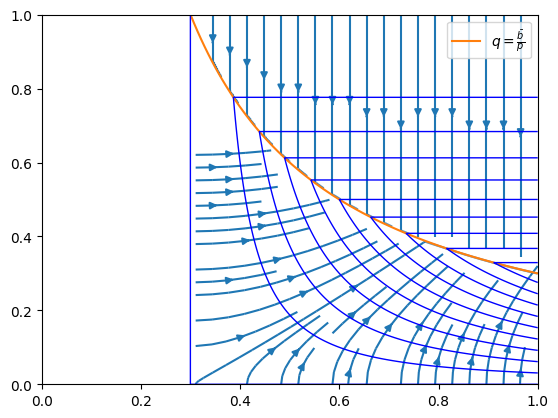

In [79]:
fig, ax = plt.subplots()
dy, dx = np.gradient(U)
ax.streamplot(X, Y, dx, dy)
ax.plot(p_lin,llega_fondo, label = '$q = \\frac{\\bar b}{p}$')
ax.contour(X, Y, U, 10,linewidths=1, colors='b', label = '$u(p,q) = \\bar b$')
ax.legend()

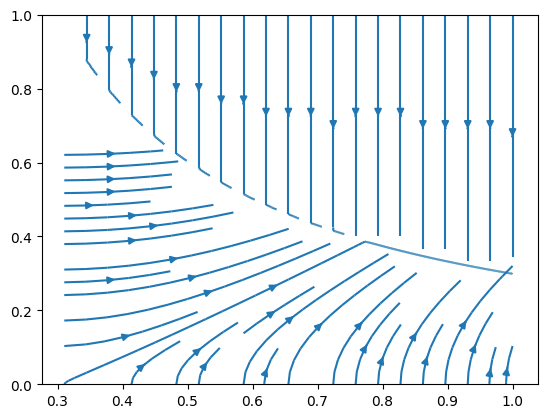

In [50]:
dy, dx = np.gradient(U)
plt.streamplot(X, Y, dx, dy)

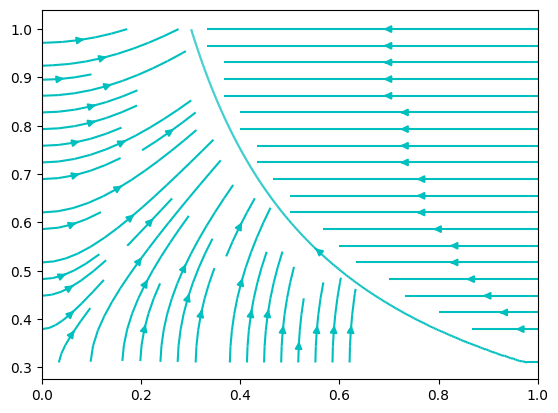

In [49]:
plt.streamplot(X, Y, dx, dy, color='c', density=1, arrowsize=1)